# 1. DATA EXPLORING, CLEANING AND WRANGLING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_excel('data_cts_corruption_and_economic_crime.xlsx')

In [3]:
df.head()

,UNODC,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,12/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
2,ARM,Armenia,Asia,Western Asia,Offences,by type of offence,Corruption,Total,Total,2013,Counts,782,CTS
3,AUT,Austria,Europe,Western Europe,Offences,by type of offence,Corruption,Total,Total,2013,Counts,3439,CTS
4,CHE,Switzerland,Europe,Western Europe,Offences,by type of offence,Corruption,Total,Total,2013,Counts,4884,CTS


In this case, since the first row only contains the date of last update and is considered useless data, I removed it. Then, I made the second row the header and updated the indices. Now, our dataset looks more organized.

In [4]:
# Let's drop first row

df.drop(0, axis=0,inplace=True)

In [5]:
df.head(1)

,UNODC,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source


In [6]:
list(df.iloc[0])

['Iso3_code',
 'Country',
 'Region',
 'Subregion',
 'Indicator',
 'Dimension',
 'Category',
 'Sex',
 'Age',
 'Year',
 'Unit of measurement',
 'VALUE',
 'Source']

In [7]:
df.columns = list(df.iloc[0])
df = df.reset_index(drop=True).drop(0,axis=0).reset_index(drop=True)

In [8]:
df.head(3)

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
0,ARM,Armenia,Asia,Western Asia,Offences,by type of offence,Corruption,Total,Total,2013,Counts,782,CTS
1,AUT,Austria,Europe,Western Europe,Offences,by type of offence,Corruption,Total,Total,2013,Counts,3439,CTS
2,CHE,Switzerland,Europe,Western Europe,Offences,by type of offence,Corruption,Total,Total,2013,Counts,4884,CTS


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20450 entries, 0 to 20449
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Iso3_code            20450 non-null  object
 1   Country              20450 non-null  object
 2   Region               20450 non-null  object
 3   Subregion            20450 non-null  object
 4   Indicator            20450 non-null  object
 5   Dimension            20450 non-null  object
 6   Category             20450 non-null  object
 7   Sex                  20450 non-null  object
 8   Age                  20450 non-null  object
 9   Year                 20450 non-null  object
 10  Unit of measurement  20450 non-null  object
 11  VALUE                20450 non-null  object
 12  Source               20450 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [10]:
df

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
0,ARM,Armenia,Asia,Western Asia,Offences,by type of offence,Corruption,Total,Total,2013,Counts,782,CTS
1,AUT,Austria,Europe,Western Europe,Offences,by type of offence,Corruption,Total,Total,2013,Counts,3439,CTS
2,CHE,Switzerland,Europe,Western Europe,Offences,by type of offence,Corruption,Total,Total,2013,Counts,4884,CTS
3,CHL,Chile,Americas,Latin America and the Caribbean,Offences,by type of offence,Corruption,Total,Total,2013,Counts,339,CTS
4,COL,Colombia,Americas,Latin America and the Caribbean,Offences,by type of offence,Corruption,Total,Total,2013,Counts,23483,CTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20445,SRB,Serbia,Europe,Southern Europe,Acts against the environment,by type of offence,Acts that result in the depletion of degradati...,Total,Total,2021,"Rate per 100,000 population",6.920872,CTS
20446,SVK,Slovakia,Europe,Eastern Europe,Acts against the environment,by type of offence,Acts that result in the depletion of degradati...,Total,Total,2021,"Rate per 100,000 population",4.258739,CTS
20447,SVN,Slovenia,Europe,Southern Europe,Acts against the environment,by type of offence,Acts that result in the depletion of degradati...,Total,Total,2021,"Rate per 100,000 population",2.595062,CTS
20448,SWE,Sweden,Europe,Northern Europe,Acts against the environment,by type of offence,Acts that result in the depletion of degradati...,Total,Total,2021,"Rate per 100,000 population",8.302206,CTS


In [11]:
df.describe()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
count,20450,20450,20450,20450,20450,20450,20450,20450,20450,20450,20450,20450,20450
unique,157,157,5,15,2,1,17,1,1,19,2,14962,17
top,SVK,Slovakia,Europe,Latin America and the Caribbean,Offences,by type of offence,Theft,Total,Total,2018,Counts,0,CTS
freq,340,340,10206,4578,18110,20450,3456,20450,20450,2054,10225,1170,19312


We can drop the dimension, sex and age columns since all the values are same.

In [12]:
df.drop(['Dimension', 'Sex', 'Age'], axis=1, inplace=True)

I will concatenate the Iso3_Code column with the Country column and check if the total number of unique values is 157. If it is 157, I will remove the Iso3_Code column.

In [13]:
df_check = df['Iso3_code'] + df['Country']

In [14]:
df_check.describe()

count           20450
unique            157
top       SVKSlovakia
freq              340
dtype: object

Let's get rid of Iso3_Code column as well.

In [15]:
df.drop('Iso3_code', axis=1, inplace=True)

In [16]:
df.head(3)

,Country,Region,Subregion,Indicator,Category,Year,Unit of measurement,VALUE,Source
0,Armenia,Asia,Western Asia,Offences,Corruption,2013,Counts,782,CTS
1,Austria,Europe,Western Europe,Offences,Corruption,2013,Counts,3439,CTS
2,Switzerland,Europe,Western Europe,Offences,Corruption,2013,Counts,4884,CTS


Now, let's get to know the dataset. I think, we can skip first 3 columns.

In [17]:
df['Source'].unique()

array(['CTS', 'MoI/CTS', 'PPR/CTS', 'DMDB', 'NSO', 'Computed', 'CTS/MoI',
       'NGO', 'MoI', 'CTS/NSO', 'CTS/NGO', 'CTS/DATASUS', 'CTS/PPR',
       'CTS/DMDB', 'CTS/MNS', 'MNS', 'PPR'], dtype=object)

I think, we can drop the "Source" column as well since we don't have anything to do with source

In [18]:
df.drop('Source', axis=1, inplace=True)

In [19]:
df['Indicator'].unique()

array(['Offences', 'Acts against the environment'], dtype=object)

In [20]:
df['Category'].unique()

array(['Corruption', 'Corruption: Bribery',
       'Corruption: Other acts of corruption', 'Smuggling of migrants',
       'Burglary', 'Theft', 'Theft: of a motorized vehicle', 'Fraud',
       'Fraud: Cyber-related (Cy)', 'Money laundering',
       'Unlawful access to a computer system',
       'Unlawful interference with a computer system or computer data',
       'Unlawful interception or access of computer data',
       'Acts that cause environmental pollution or degradation',
       'Acts involving the movement of dumping of waste',
       'Trade or possession of protected or prohibited species of faune and flora',
       'Acts that result in the depletion of degradation of natural resources'],
      dtype=object)

This code retrieves the categories types where the indicator is 'Acts against the environment'

In [21]:
df[df['Indicator'] == 'Acts against the environment']['Category'].unique()

array(['Acts that cause environmental pollution or degradation',
       'Acts involving the movement of dumping of waste',
       'Trade or possession of protected or prohibited species of faune and flora',
       'Acts that result in the depletion of degradation of natural resources'],
      dtype=object)

This code retrieves the categories types where the indicator is 'Offences'

In [22]:
df[df['Indicator'] == 'Offences']['Category'].unique()

array(['Corruption', 'Corruption: Bribery',
       'Corruption: Other acts of corruption', 'Smuggling of migrants',
       'Burglary', 'Theft', 'Theft: of a motorized vehicle', 'Fraud',
       'Fraud: Cyber-related (Cy)', 'Money laundering',
       'Unlawful access to a computer system',
       'Unlawful interference with a computer system or computer data',
       'Unlawful interception or access of computer data'], dtype=object)

I would like to further understand the data by filtering for the United States in the country column. Afterwards, I will filter for Turkey to examine. This way, I can get a better sense of how the data is recorded.

In [23]:
df[df['Country'] == 'United States of America']

,Country,Region,Subregion,Indicator,Category,Year,Unit of measurement,VALUE
26,United States of America,Americas,Northern America,Offences,Corruption,2013,Counts,15700
65,United States of America,Americas,Northern America,Offences,Corruption,2014,Counts,16200
111,United States of America,Americas,Northern America,Offences,Corruption,2015,Counts,15900
182,United States of America,Americas,Northern America,Offences,Corruption,2016,Counts,15900
256,United States of America,Americas,Northern America,Offences,Corruption,2017,Counts,15967
...,...,...,...,...,...,...,...,...
17396,United States of America,Americas,Northern America,Offences,Fraud,2015,"Rate per 100,000 population",41.003331
17464,United States of America,Americas,Northern America,Offences,Fraud,2016,"Rate per 100,000 population",39.271392
17532,United States of America,Americas,Northern America,Offences,Fraud,2017,"Rate per 100,000 population",37.660189
17608,United States of America,Americas,Northern America,Offences,Fraud,2018,"Rate per 100,000 population",36.129339


In [24]:
df[(df['Country'] == 'United States of America') & (df['Unit of measurement'] == 'Counts')]

,Country,Region,Subregion,Indicator,Category,Year,Unit of measurement,VALUE
26,United States of America,Americas,Northern America,Offences,Corruption,2013,Counts,15700
65,United States of America,Americas,Northern America,Offences,Corruption,2014,Counts,16200
111,United States of America,Americas,Northern America,Offences,Corruption,2015,Counts,15900
182,United States of America,Americas,Northern America,Offences,Corruption,2016,Counts,15900
256,United States of America,Americas,Northern America,Offences,Corruption,2017,Counts,15967
...,...,...,...,...,...,...,...,...
7171,United States of America,Americas,Northern America,Offences,Fraud,2015,Counts,133100
7239,United States of America,Americas,Northern America,Offences,Fraud,2016,Counts,128500
7307,United States of America,Americas,Northern America,Offences,Fraud,2017,Counts,124200
7383,United States of America,Americas,Northern America,Offences,Fraud,2018,Counts,120000


In [25]:
df[(df['Country'] == 'Türkiye')]

,Country,Region,Subregion,Indicator,Category,Year,Unit of measurement,VALUE
25,Türkiye,Asia,Western Asia,Offences,Corruption,2013,Counts,7480
64,Türkiye,Asia,Western Asia,Offences,Corruption,2014,Counts,7202
584,Türkiye,Asia,Western Asia,Offences,Corruption: Bribery,2013,Counts,2450
628,Türkiye,Asia,Western Asia,Offences,Corruption: Bribery,2014,Counts,2927
1165,Türkiye,Asia,Western Asia,Offences,Corruption: Other acts of corruption,2013,Counts,5030
...,...,...,...,...,...,...,...,...
17340,Türkiye,Asia,Western Asia,Offences,Fraud,2014,"Rate per 100,000 population",109.707752
17771,Türkiye,Asia,Western Asia,Offences,Fraud: Cyber-related (Cy),2013,"Rate per 100,000 population",26.346334
17792,Türkiye,Asia,Western Asia,Offences,Fraud: Cyber-related (Cy),2014,"Rate per 100,000 population",21.57669
18043,Türkiye,Asia,Western Asia,Offences,Money laundering,2013,"Rate per 100,000 population",0.967665


In [26]:
len(df[(df['Country'] == 'Türkiye') & (df['Unit of measurement'] == 'Counts')])

53

From these outputs, we can infer that it provides both the number of crimes committed and the number of crimes committed per 100,000 people by country, category, and year.

# 2. MAKING HYPOTHESIS

## 2.1. Let's start by creating two new columns based on the "Unit of measurement" column, which has two values: "Counts" and "Rate per 100,000 population."

In [27]:
df['Unit of measurement'].value_counts()

Unit of measurement
Counts                         10225
Rate per 100,000 population    10225
Name: count, dtype: int64

Here, both variables have the same number of observations, but one variable might have missing values replaced with 0. I will proceed by checking this.

In [28]:
df.sample(5)

,Country,Region,Subregion,Indicator,Category,Year,Unit of measurement,VALUE
7167,Slovakia,Europe,Eastern Europe,Offences,Fraud,2015,Counts,2700
4692,Kosovo under UNSCR 1244,Europe,Southern Europe,Offences,Theft,2012,Counts,16292
6655,United Arab Emirates,Asia,Western Asia,Offences,Theft: of a motorized vehicle,2016,Counts,750
19863,Germany,Europe,Western Europe,Acts against the environment,Acts involving the movement of dumping of waste,2021,"Rate per 100,000 population",0.027575
17359,Denmark,Europe,Northern Europe,Offences,Fraud,2015,"Rate per 100,000 population",552.661631


In [29]:
df_check_duality = df['Country'] + df['Category'] + df['Category'] + df['Year'].astype(str)

In [30]:
len(df_check_duality)

20450

Here, a value in the concatenated column should be found twice.

In [31]:
df_check_duality.value_counts().unique()

array([2], dtype=int64)

Here, I've concatenated the columns above and they need to be in pairs as counts and rates per 100,000 population. When I check, they are in pairs. Now, I will join them with a 'Unit of Measurement' column below and check if each value is unique.

In [32]:
df_check_duality_2 = df['Country'] + df['Category'] + df['Category'] + df['Year'].astype(str) + df['Unit of measurement']

In [33]:
df_check_duality_2.nunique()

20450

Great! Now, let's create the Counts or Rate per 100,000 population columns!

In [34]:
df.head(0)

,Country,Region,Subregion,Indicator,Category,Year,Unit of measurement,VALUE


In [35]:
df = df.sort_values(['Country','Year','Indicator','Category']).reset_index(drop=True)

In [36]:
df

,Country,Region,Subregion,Indicator,Category,Year,Unit of measurement,VALUE
0,Albania,Europe,Southern Europe,Offences,Burglary,2005,Counts,199
1,Albania,Europe,Southern Europe,Offences,Burglary,2005,"Rate per 100,000 population",6.561952
2,Albania,Europe,Southern Europe,Offences,Theft,2005,Counts,2986
3,Albania,Europe,Southern Europe,Offences,Theft,2005,"Rate per 100,000 population",98.462261
4,Albania,Europe,Southern Europe,Offences,Theft: of a motorized vehicle,2005,Counts,708
...,...,...,...,...,...,...,...,...
20445,Zimbabwe,Africa,Sub-Saharan Africa,Offences,Burglary,2008,"Rate per 100,000 population",375.686809
20446,Zimbabwe,Africa,Sub-Saharan Africa,Offences,Theft,2008,Counts,91456
20447,Zimbabwe,Africa,Sub-Saharan Africa,Offences,Theft,2008,"Rate per 100,000 population",728.71289
20448,Zimbabwe,Africa,Sub-Saharan Africa,Offences,Theft: of a motorized vehicle,2008,Counts,444


In [37]:
pivoted_df = df.copy().pivot(index=['Country', 'Region', 'Subregion','Year', 'Indicator', 'Category'],
                            columns='Unit of measurement',
                      values='VALUE')

In [38]:
pivoted_df

Unit of measurement                                                             Counts   
Country  Region Subregion          Year Indicator Category                               
Albania  Europe Southern Europe    2005 Offences  Burglary                         199  \
                                                  Theft                           2986   
                                                  Theft: of a motorized vehicle    708   
                                   2006 Offences  Burglary                         164   
                                                  Theft                           2919   
...                                                                                ...   
Zimbabwe Africa Sub-Saharan Africa 2007 Offences  Theft                          99839   
                                                  Theft: of a motorized vehicle    391   
                                   2008 Offences  Burglary                       47150   
                                                  Theft                          91456   
                                                  Theft: of a motorized vehicle    444   

Unit of measurement                                                             Rate per 100,000 population  
Country  Region Subregion          Year Indicator Category                                                   
Albania  Europe Southern Europe    2005 Offences  Burglary                                         6.561952  
                                                  Theft                                           98.462261  
                                                  Theft: of a motorized vehicle                   23.346042  
                                   2006 Offences  Burglary                                         5.460502  
                                                  Theft                                           97.190272  
...                                                                                                     ...  
Zimbabwe Africa Sub-Saharan Africa 2007 Offences  Theft                                          801.883095  
                                                  Theft: of a motorized vehicle                    3.140419  
                                   2008 Offences  Burglary                                       375.686809  
                                                  Theft                                           728.71289  
                                                  Theft: of a motorized vehicle                    3.537751  

[10225 rows x 2 columns]

In [39]:
pivoted_df = pivoted_df.reset_index()

In [40]:
pivoted_df

Unit of measurement,Country,Region,Subregion,Year,Indicator,Category,Counts,"Rate per 100,000 population"
0,Albania,Europe,Southern Europe,2005,Offences,Burglary,199,6.561952
1,Albania,Europe,Southern Europe,2005,Offences,Theft,2986,98.462261
2,Albania,Europe,Southern Europe,2005,Offences,Theft: of a motorized vehicle,708,23.346042
3,Albania,Europe,Southern Europe,2006,Offences,Burglary,164,5.460502
4,Albania,Europe,Southern Europe,2006,Offences,Theft,2919,97.190272
...,...,...,...,...,...,...,...,...
10220,Zimbabwe,Africa,Sub-Saharan Africa,2007,Offences,Theft,99839,801.883095
10221,Zimbabwe,Africa,Sub-Saharan Africa,2007,Offences,Theft: of a motorized vehicle,391,3.140419
10222,Zimbabwe,Africa,Sub-Saharan Africa,2008,Offences,Burglary,47150,375.686809
10223,Zimbabwe,Africa,Sub-Saharan Africa,2008,Offences,Theft,91456,728.71289


Let's remove the 'Unit of Measurement' part above the indexes.

In [41]:
pivoted_df.columns.name = None

Great! Now, let's look at those where either Counts or Rate per 100,000 population is 0 and the equivalent is different from 0.

In [42]:
pivoted_df[
    ((pivoted_df['Counts'] != 0) & (pivoted_df['Rate per 100,000 population'] == 0)) |
    ((pivoted_df['Counts'] == 0) & (pivoted_df['Rate per 100,000 population'] != 0))
]

,Country,Region,Subregion,Year,Indicator,Category,Counts,"Rate per 100,000 population"


GREAT!

In [43]:
# Let's change the column name for Rate per 100,000 population

pivoted_df = pivoted_df.rename(columns={'Rate per 100,000 population':'Rate_100k'})


In [44]:
pivoted_df.head(1)

,Country,Region,Subregion,Year,Indicator,Category,Counts,Rate_100k
0,Albania,Europe,Southern Europe,2005,Offences,Burglary,199,6.561952


In [45]:
pivoted_df[
    
    ((pivoted_df['Counts'] == 0) & (pivoted_df['Rate_100k'] == 0))
    
]

,Country,Region,Subregion,Year,Indicator,Category,Counts,Rate_100k
43,Albania,Europe,Southern Europe,2015,Offences,Unlawful interception or access of computer data,0,0
45,Albania,Europe,Southern Europe,2016,Acts against the environment,Acts involving the movement of dumping of waste,0,0
58,Albania,Europe,Southern Europe,2016,Offences,Unlawful interception or access of computer data,0,0
60,Albania,Europe,Southern Europe,2017,Acts against the environment,Acts involving the movement of dumping of waste,0,0
73,Albania,Europe,Southern Europe,2017,Offences,Unlawful interception or access of computer data,0,0
...,...,...,...,...,...,...,...,...
9927,United Kingdom (Northern Ireland),Europe,Northern Europe,2019,Offences,Smuggling of migrants,0,0
9928,United Kingdom (Northern Ireland),Europe,Northern Europe,2020,Offences,Corruption: Bribery,0,0
9929,United Kingdom (Northern Ireland),Europe,Northern Europe,2020,Offences,Smuggling of migrants,0,0
9930,United Kingdom (Northern Ireland),Europe,Northern Europe,2021,Offences,Corruption: Bribery,0,0


Let's get rid of these useless data!

In [46]:
df = pivoted_df[
    
    ((pivoted_df['Counts'] != 0) & (pivoted_df['Rate_100k'] != 0))
    
]

In [47]:
df

,Country,Region,Subregion,Year,Indicator,Category,Counts,Rate_100k
0,Albania,Europe,Southern Europe,2005,Offences,Burglary,199,6.561952
1,Albania,Europe,Southern Europe,2005,Offences,Theft,2986,98.462261
2,Albania,Europe,Southern Europe,2005,Offences,Theft: of a motorized vehicle,708,23.346042
3,Albania,Europe,Southern Europe,2006,Offences,Burglary,164,5.460502
4,Albania,Europe,Southern Europe,2006,Offences,Theft,2919,97.190272
...,...,...,...,...,...,...,...,...
10220,Zimbabwe,Africa,Sub-Saharan Africa,2007,Offences,Theft,99839,801.883095
10221,Zimbabwe,Africa,Sub-Saharan Africa,2007,Offences,Theft: of a motorized vehicle,391,3.140419
10222,Zimbabwe,Africa,Sub-Saharan Africa,2008,Offences,Burglary,47150,375.686809
10223,Zimbabwe,Africa,Sub-Saharan Africa,2008,Offences,Theft,91456,728.71289


## 2.2. Now that we know each of these rows represents a data point for each country, we will first find out how many rows there are for each Region, Subregion, and Country. In other words, we will determine the number of data points for each category. Then, we will create box plots for the 5 regions, with Subregion on the x-axis and the number of rows or data points for each country on the y-axis displayed in the boxes.

In [48]:
data_by_country = df[['Region','Subregion','Country']].copy().value_counts()

In [49]:
type(data_by_country) # Let's convert to dataframe

pandas.core.series.Series

In [50]:
data_by_country = data_by_country.to_frame().reset_index()

In [51]:
data_by_country

,Region,Subregion,Country,count
0,Europe,Eastern Europe,Slovakia,162
1,Europe,Eastern Europe,Poland,161
2,Europe,Southern Europe,Serbia,153
3,Europe,Southern Europe,Italy,153
4,Europe,Northern Europe,Finland,150
...,...,...,...,...
151,Africa,Sub-Saharan Africa,Burundi,3
152,Africa,Sub-Saharan Africa,Benin,2
153,Asia,South-eastern Asia,Timor-Leste,1
154,Africa,Northern Africa,Sudan,1


In [52]:
df['Region'].unique()

array(['Europe', 'Africa', 'Americas', 'Asia', 'Oceania'], dtype=object)

In [53]:
df['Subregion'].unique()

array(['Southern Europe', 'Northern Africa',
       'Latin America and the Caribbean', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Southern Asia',
       'Eastern Europe', 'Sub-Saharan Africa', 'Northern America',
       'South-eastern Asia', 'Eastern Asia', 'Northern Europe',
       'Central Asia', 'Melanesia'], dtype=object)

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

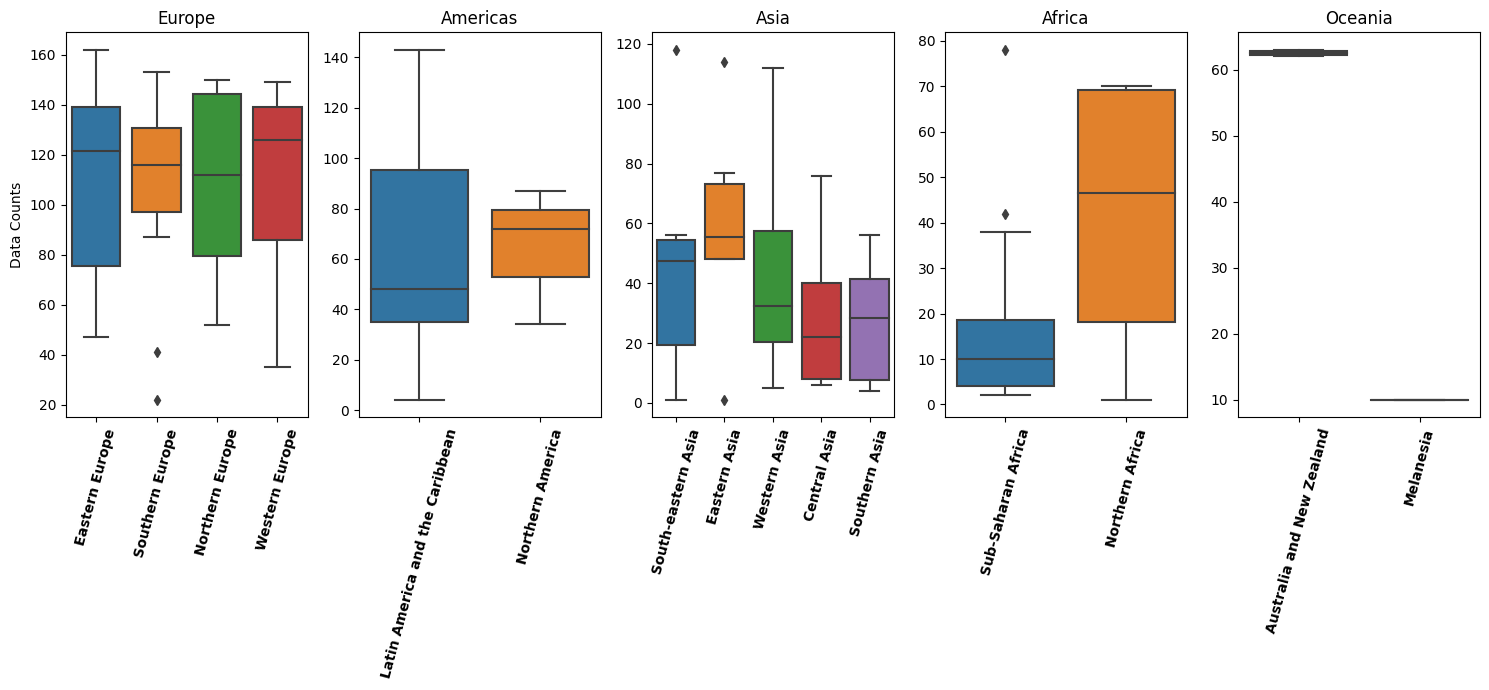

In [55]:
# Create a 1x5 grid for subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 7))

# Initialize index for accessing axes
i = 0

# Iterate over unique regions
for region in data_by_country['Region'].unique():
    # Create a boxplot for the current region
    sns.boxplot(data=data_by_country[data_by_country['Region']==region], x='Subregion', y='count', ax=axes[i])
    
    # Rotate x-axis labels and make them bold
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=75, fontweight='bold')
    
    # Set subplot title as the region name
    axes[i].set_title(region)
    
    # Remove x-axis label
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Data Counts')
    
    # Remove y-axis label except for the first subplot
    if i != 0:
        axes[i].set_ylabel(None)
    
    # Move to the next subplot
    i += 1

# Adjust layout for better appearance
fig.tight_layout()

# Display the plot
plt.show()

In general, data entry in the European continent is much higher compared to others. When we look at the sub-regions within Europe, we can see that Eastern Europe has data entries that do not conform to the normal distribution and are quite extensive compared to other countries. Especially in Latin America and the Caribbean, we see this wide distribution the most. In Southern Europe, except for two outliers, we can see that other countries have made good data entries. In Asia and Africa, we see more outliers, especially in the Sub-Saharan Africa and Eastern Asia regions.

## 2.3. Now, I will create a table showing the number of data points for each year and crime category. In this new dataframe, we will have a "Year" column and columns for crime categories. Years will be sorted in ascending order, and the columns for crime categories will be sorted from the most to the least number of data points.

In [56]:
df

,Country,Region,Subregion,Year,Indicator,Category,Counts,Rate_100k
0,Albania,Europe,Southern Europe,2005,Offences,Burglary,199,6.561952
1,Albania,Europe,Southern Europe,2005,Offences,Theft,2986,98.462261
2,Albania,Europe,Southern Europe,2005,Offences,Theft: of a motorized vehicle,708,23.346042
3,Albania,Europe,Southern Europe,2006,Offences,Burglary,164,5.460502
4,Albania,Europe,Southern Europe,2006,Offences,Theft,2919,97.190272
...,...,...,...,...,...,...,...,...
10220,Zimbabwe,Africa,Sub-Saharan Africa,2007,Offences,Theft,99839,801.883095
10221,Zimbabwe,Africa,Sub-Saharan Africa,2007,Offences,Theft: of a motorized vehicle,391,3.140419
10222,Zimbabwe,Africa,Sub-Saharan Africa,2008,Offences,Burglary,47150,375.686809
10223,Zimbabwe,Africa,Sub-Saharan Africa,2008,Offences,Theft,91456,728.71289


In [57]:
df['Year'].value_counts().to_frame().sort_values('Year')

,count
Year,
2003,182
2004,233
2005,273
2006,294
2007,287
2008,306
2009,304
2010,313
2011,301


Here, we can see the number of crime data points given for each year. As the years progress, we see a significant increase in the number of data points. However, this does not necessarily mean that we cannot make reliable inferences from past years. Some of the 16 crime categories may have started to be added as technology advanced. Some may have been added as they were perceived as problems over the years. To see this, as we wrote in the hypothesis, we need to look at both the year and the crime categories. Additionally, the data for 2021, which appears as the latest year, seems to be taken for only a part of the year rather than the entire year. This could mislead us in our analysis.

In [58]:
category_counts = df['Category'].copy().value_counts().to_frame().reset_index()

In [59]:
category_counts

,Category,count
0,Theft,1719
1,Theft: of a motorized vehicle,1602
2,Burglary,1492
3,Corruption,539
4,Corruption: Bribery,523
5,Smuggling of migrants,497
6,Fraud,481
7,Corruption: Other acts of corruption,460
8,Money laundering,391
9,Unlawful access to a computer system,311


Here, we can see the counts of data points by crime categories. This will be needed to re-order columns further. Additionally, we can see from here that data related to technology-related crimes and crimes related to nature is less compared to others.

In [60]:
year_counts_by_category = df[['Year','Category']].copy().value_counts().to_frame().reset_index().pivot(index='Year',columns='Category',values='count').reset_index()
'''This code calculates the count of data points for each combination of "Year" and "Category" in the DataFrame. It then creates a new DataFrame where each row represents a year, and each column 
represents a crime category, with the values indicating the count of data points for that category in that year.'''

'This code calculates the count of data points for each combination of "Year" and "Category" in the DataFrame. It then creates a new DataFrame where each row represents a year, and each column \nrepresents a crime category, with the values indicating the count of data points for that category in that year.'

In [61]:
year_counts_by_category.head(1)

Category,Year,Acts involving the movement of dumping of waste,Acts that cause environmental pollution or degradation,Acts that result in the depletion of degradation of natural resources,Burglary,Corruption,Corruption: Bribery,Corruption: Other acts of corruption,Fraud,Fraud: Cyber-related (Cy),Money laundering,Smuggling of migrants,Theft,Theft: of a motorized vehicle,Trade or possession of protected or prohibited species of faune and flora,Unlawful access to a computer system,Unlawful interception or access of computer data,Unlawful interference with a computer system or computer data
0,2003,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,63.0,NaN,NaN,NaN,NaN


In [62]:
year_counts_by_category.columns.name = None

In [63]:
year_counts_by_category

,Year,Acts involving the movement of dumping of waste,Acts that cause environmental pollution or degradation,Acts that result in the depletion of degradation of natural resources,Burglary,Corruption,Corruption: Bribery,Corruption: Other acts of corruption,Fraud,Fraud: Cyber-related (Cy),Money laundering,Smuggling of migrants,Theft,Theft: of a motorized vehicle,Trade or possession of protected or prohibited species of faune and flora,Unlawful access to a computer system,Unlawful interception or access of computer data,Unlawful interference with a computer system or computer data
0,2003,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,63.0,NaN,NaN,NaN,NaN
1,2004,NaN,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,80.0,NaN,NaN,NaN,NaN
2,2005,NaN,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,96.0,NaN,NaN,NaN,NaN
3,2006,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,103.0,NaN,NaN,NaN,NaN
4,2007,NaN,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,97.0,NaN,NaN,NaN,NaN
5,2008,NaN,NaN,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,101.0,NaN,NaN,NaN,NaN
6,2009,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,100.0,NaN,NaN,NaN,NaN
7,2010,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.0,103.0,NaN,NaN,NaN,NaN
8,2011,NaN,NaN,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,99.0,NaN,NaN,NaN,NaN
9,2012,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,101.0,NaN,NaN,NaN,NaN


In [64]:
year_counts_by_category = year_counts_by_category[['Year']+list(category_counts['Category'])]

#Here, we have repositioned the crime categories column based on the most to least data points.

In [65]:
year_counts_by_category.columns

Index(['Year', 'Theft', 'Theft: of a motorized vehicle', 'Burglary',
       'Corruption', 'Corruption: Bribery', 'Smuggling of migrants', 'Fraud',
       'Corruption: Other acts of corruption', 'Money laundering',
       'Unlawful access to a computer system',
       'Acts that cause environmental pollution or degradation',
       'Unlawful interference with a computer system or computer data',
       'Acts that result in the depletion of degradation of natural resources',
       'Fraud: Cyber-related (Cy)',
       'Acts involving the movement of dumping of waste',
       'Trade or possession of protected or prohibited species of faune and flora',
       'Unlawful interception or access of computer data'],
      dtype='object')

In [66]:
year_counts_by_category

,Year,Theft,Theft: of a motorized vehicle,Burglary,Corruption,Corruption: Bribery,Smuggling of migrants,Fraud,Corruption: Other acts of corruption,Money laundering,Unlawful access to a computer system,Acts that cause environmental pollution or degradation,Unlawful interference with a computer system or computer data,Acts that result in the depletion of degradation of natural resources,Fraud: Cyber-related (Cy),Acts involving the movement of dumping of waste,Trade or possession of protected or prohibited species of faune and flora,Unlawful interception or access of computer data
0,2003,67.0,63.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,85.0,80.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,98.0,96.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006,103.0,103.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,101.0,97.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008,110.0,101.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009,110.0,100.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010,113.0,103.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011,107.0,99.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2012,107.0,101.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We are actually calculating how many countries' data are available for each category by years in the table.
- Here, we can conduct a reliable analysis of the 'Theft', 'Theft: of a motorized vehicle', and 'Burglary' crime categories from 2003 to 2020. However, there seems to be no data available for 2021.

- When we examine the crime categories associated with corruption, we see data entries starting from 2013. In 2021, there are fewer data entries compared to previous years. Therefore, while 2021 might be misleading when analyzed globally or continentally, it could still be considered at a country level.

- Generally, crimes related to technology and nature show data entries around 2013 or 2014. In fact, these categories seem to have consistent data entries even in 2021, unlike the previously mentioned crimes. With these insights, I believe we can conduct more reliable analyses in future hypotheses.

### 2.3.1. I will now create a function that updates above table automatically based on the country or subregion or region entered.

In [67]:
df[df['Country'] == 'Türkiye']['Category'].value_counts().to_frame().reset_index()

,Category,count
0,Theft,12
1,Theft: of a motorized vehicle,11
2,Burglary,10
3,Smuggling of migrants,8
4,Corruption,2
5,Corruption: Bribery,2
6,Corruption: Other acts of corruption,2
7,Fraud,2
8,Fraud: Cyber-related (Cy),2
9,Money laundering,2


In [68]:
def filter_data_counts_by_place(place):
    
    if place in list(df['Country'].unique()):
    
        category_counts_by_place = list(df[df['Country'] == place]['Category'].copy().value_counts().to_frame().reset_index()['Category'])

        year_counts_by_category_and_place = df[df['Country'] == place][['Year','Category']].copy().value_counts().to_frame().reset_index().pivot(index='Year',columns='Category',values='count').reset_index()

        year_counts_by_category_and_place.columns.name = None

        year_counts_by_category_and_place = year_counts_by_category_and_place[['Year'] + category_counts_by_place]

        return year_counts_by_category_and_place
    
    elif place in list(df['Subregion'].unique()):
        
        print('There are ', df[df['Subregion'] == place]['Country'].nunique(), 'countries in the subregion of', place)
        
        category_counts_by_place = list(df[df['Subregion'] == place]['Category'].copy().value_counts().to_frame().reset_index()['Category'])

        year_counts_by_category_and_place = df[df['Subregion'] == place][['Year','Category']].copy().value_counts().to_frame().reset_index().pivot(index='Year',columns='Category',values='count').reset_index()

        year_counts_by_category_and_place.columns.name = None

        year_counts_by_category_and_place = year_counts_by_category_and_place[['Year'] + category_counts_by_place]

        return year_counts_by_category_and_place
    
    elif place in list(df['Region'].unique()):
        
        print('There are ', df[df['Region'] == place]['Country'].nunique(), 'countries in the region of', place)
        
        category_counts_by_place = list(df[df['Region'] == place]['Category'].copy().value_counts().to_frame().reset_index()['Category'])

        year_counts_by_category_and_place = df[df['Region'] == place][['Year','Category']].copy().value_counts().to_frame().reset_index().pivot(index='Year',columns='Category',values='count').reset_index()

        year_counts_by_category_and_place.columns.name = None

        year_counts_by_category_and_place = year_counts_by_category_and_place[['Year'] + category_counts_by_place]

        return year_counts_by_category_and_place
    
    else:
        
        print('Please enter country, region or subregion!')

In [69]:
filter_data_counts_by_place('Slovakia')

,Year,Burglary,Theft: of a motorized vehicle,Theft,Corruption,Corruption: Bribery,Corruption: Other acts of corruption,Smuggling of migrants,Acts that cause environmental pollution or degradation,Unlawful access to a computer system,Trade or possession of protected or prohibited species of faune and flora,Acts that result in the depletion of degradation of natural resources,Money laundering,Acts involving the movement of dumping of waste,Fraud: Cyber-related (Cy),Fraud,Unlawful interception or access of computer data,Unlawful interference with a computer system or computer data
0,2003,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2012,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
filter_data_counts_by_place('Western Europe')

There are  9 countries in the subregion of Western Europe


,Year,Burglary,Theft,Theft: of a motorized vehicle,Corruption,Smuggling of migrants,Fraud,Money laundering,Corruption: Bribery,Corruption: Other acts of corruption,Unlawful access to a computer system,Acts that cause environmental pollution or degradation,Acts involving the movement of dumping of waste,Unlawful interference with a computer system or computer data,Acts that result in the depletion of degradation of natural resources,Unlawful interception or access of computer data,Trade or possession of protected or prohibited species of faune and flora,Fraud: Cyber-related (Cy)
0,2003,6.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,7.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2012,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
filter_data_counts_by_place('Europe')

There are  45 countries in the region of Europe


,Year,Theft,Theft: of a motorized vehicle,Burglary,Smuggling of migrants,Corruption,Corruption: Bribery,Fraud,Money laundering,Corruption: Other acts of corruption,Acts that cause environmental pollution or degradation,Unlawful access to a computer system,Acts that result in the depletion of degradation of natural resources,Unlawful interference with a computer system or computer data,Acts involving the movement of dumping of waste,Fraud: Cyber-related (Cy),Trade or possession of protected or prohibited species of faune and flora,Unlawful interception or access of computer data
0,2003,34.0,31.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,36.0,35.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,40.0,41.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006,42.0,42.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,43.0,41.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008,44.0,42.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009,44.0,43.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010,44.0,43.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011,42.0,41.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2012,43.0,42.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
filter_data_counts_by_place('Asia')

There are  45 countries in the region of Asia


,Year,Theft,Theft: of a motorized vehicle,Burglary,Corruption: Bribery,Corruption: Other acts of corruption,Corruption,Fraud,Smuggling of migrants,Unlawful access to a computer system,Money laundering,Unlawful interference with a computer system or computer data,Fraud: Cyber-related (Cy),Unlawful interception or access of computer data,Acts that cause environmental pollution or degradation,Acts that result in the depletion of degradation of natural resources,Trade or possession of protected or prohibited species of faune and flora,Acts involving the movement of dumping of waste
0,2003,17.0,16.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,23.0,22.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,27.0,27.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006,26.0,29.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,22.0,23.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008,29.0,26.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009,27.0,23.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010,28.0,23.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011,27.0,23.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2012,26.0,22.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df

,Country,Region,Subregion,Year,Indicator,Category,Counts,Rate_100k
0,Albania,Europe,Southern Europe,2005,Offences,Burglary,199,6.561952
1,Albania,Europe,Southern Europe,2005,Offences,Theft,2986,98.462261
2,Albania,Europe,Southern Europe,2005,Offences,Theft: of a motorized vehicle,708,23.346042
3,Albania,Europe,Southern Europe,2006,Offences,Burglary,164,5.460502
4,Albania,Europe,Southern Europe,2006,Offences,Theft,2919,97.190272
...,...,...,...,...,...,...,...,...
10220,Zimbabwe,Africa,Sub-Saharan Africa,2007,Offences,Theft,99839,801.883095
10221,Zimbabwe,Africa,Sub-Saharan Africa,2007,Offences,Theft: of a motorized vehicle,391,3.140419
10222,Zimbabwe,Africa,Sub-Saharan Africa,2008,Offences,Burglary,47150,375.686809
10223,Zimbabwe,Africa,Sub-Saharan Africa,2008,Offences,Theft,91456,728.71289


## 2.4. Now, for the sake of further calculation, let's round the values in the Rate_100k column to the nearest integer.

In [74]:
df.loc[:, 'Rate_100k'] = df['Rate_100k'].apply(lambda float_num: round(float_num,0)).astype(int)

In [75]:
df

,Country,Region,Subregion,Year,Indicator,Category,Counts,Rate_100k
0,Albania,Europe,Southern Europe,2005,Offences,Burglary,199,7
1,Albania,Europe,Southern Europe,2005,Offences,Theft,2986,98
2,Albania,Europe,Southern Europe,2005,Offences,Theft: of a motorized vehicle,708,23
3,Albania,Europe,Southern Europe,2006,Offences,Burglary,164,5
4,Albania,Europe,Southern Europe,2006,Offences,Theft,2919,97
...,...,...,...,...,...,...,...,...
10220,Zimbabwe,Africa,Sub-Saharan Africa,2007,Offences,Theft,99839,802
10221,Zimbabwe,Africa,Sub-Saharan Africa,2007,Offences,Theft: of a motorized vehicle,391,3
10222,Zimbabwe,Africa,Sub-Saharan Africa,2008,Offences,Burglary,47150,376
10223,Zimbabwe,Africa,Sub-Saharan Africa,2008,Offences,Theft,91456,729


In [76]:
filter_data_counts_by_place('Türkiye')

,Year,Theft,Theft: of a motorized vehicle,Burglary,Smuggling of migrants,Corruption,Corruption: Bribery,Corruption: Other acts of corruption,Fraud,Fraud: Cyber-related (Cy),Money laundering
0,2003,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2012,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.5. Analysis of Theft Crimes from 2003 to 2014 in Türkiye
- Now, I will find out how many individuals committed the crime of Theft from 2003 to 2012 in total. 
- Then, I will find out on average how many individuals per 100,000 committed theft related crime during these years.

In [77]:
theft_data_türkiye = df[(df['Country'] == 'Türkiye') & (df['Category'].str.contains('theft',case=False))].copy()

In [78]:
theft_data_türkiye # Let's also consider that there were no records of 'Theft: of a motorized vehicle' in Turkey for the years 2013 and 2014. We'll consider up to 2012. Let's get rid of 2013,2014, 2020 data!

,Country,Region,Subregion,Year,Indicator,Category,Counts,Rate_100k
9603,Türkiye,Asia,Western Asia,2003,Offences,Theft,66405,99
9604,Türkiye,Asia,Western Asia,2003,Offences,Theft: of a motorized vehicle,25443,38
9606,Türkiye,Asia,Western Asia,2004,Offences,Theft,67406,99
9607,Türkiye,Asia,Western Asia,2004,Offences,Theft: of a motorized vehicle,25667,38
9609,Türkiye,Asia,Western Asia,2005,Offences,Theft,103753,151
9610,Türkiye,Asia,Western Asia,2005,Offences,Theft: of a motorized vehicle,33344,49
9612,Türkiye,Asia,Western Asia,2006,Offences,Theft,171772,247
9613,Türkiye,Asia,Western Asia,2006,Offences,Theft: of a motorized vehicle,33091,48
9615,Türkiye,Asia,Western Asia,2007,Offences,Theft,149763,213
9616,Türkiye,Asia,Western Asia,2007,Offences,Theft: of a motorized vehicle,24185,34


In [79]:
theft_data_türkiye = theft_data_türkiye.iloc[:-3,:]

In [80]:
theft_data_türkiye

,Country,Region,Subregion,Year,Indicator,Category,Counts,Rate_100k
9603,Türkiye,Asia,Western Asia,2003,Offences,Theft,66405,99
9604,Türkiye,Asia,Western Asia,2003,Offences,Theft: of a motorized vehicle,25443,38
9606,Türkiye,Asia,Western Asia,2004,Offences,Theft,67406,99
9607,Türkiye,Asia,Western Asia,2004,Offences,Theft: of a motorized vehicle,25667,38
9609,Türkiye,Asia,Western Asia,2005,Offences,Theft,103753,151
9610,Türkiye,Asia,Western Asia,2005,Offences,Theft: of a motorized vehicle,33344,49
9612,Türkiye,Asia,Western Asia,2006,Offences,Theft,171772,247
9613,Türkiye,Asia,Western Asia,2006,Offences,Theft: of a motorized vehicle,33091,48
9615,Türkiye,Asia,Western Asia,2007,Offences,Theft,149763,213
9616,Türkiye,Asia,Western Asia,2007,Offences,Theft: of a motorized vehicle,24185,34


In [81]:
theft_data_türkiye_upd = theft_data_türkiye.copy().groupby(['Country','Region','Subregion','Year']).agg({'Counts':'sum', 'Rate_100k':'mean'}).reset_index()
# Here, let's summarize all theft crimes by years using group by.

In [82]:
theft_data_türkiye_upd

,Country,Region,Subregion,Year,Counts,Rate_100k
0,Türkiye,Asia,Western Asia,2003,91848,68.5
1,Türkiye,Asia,Western Asia,2004,93073,68.5
2,Türkiye,Asia,Western Asia,2005,137097,100.0
3,Türkiye,Asia,Western Asia,2006,204863,147.5
4,Türkiye,Asia,Western Asia,2007,173948,123.5
5,Türkiye,Asia,Western Asia,2008,146513,102.5
6,Türkiye,Asia,Western Asia,2009,174545,121.0
7,Türkiye,Asia,Western Asia,2010,207945,142.0
8,Türkiye,Asia,Western Asia,2011,209866,141.5
9,Türkiye,Asia,Western Asia,2012,239926,159.5


In [83]:
'{:,.0f}'.format(theft_data_türkiye_upd['Counts'].sum())

'1,679,624'

Between 2003 and 2012, 1,679,624 individuals committed crimes related to theft in Turkey.

In [84]:
round(theft_data_türkiye_upd['Rate_100k'].mean(),0)

117.0

Between 2003 and 2012, an average of 117 individuals per 100,000 committed crimes related to theft.

In [85]:
theft_data_türkiye_upd.columns

Index(['Country', 'Region', 'Subregion', 'Year', 'Counts', 'Rate_100k'], dtype='object')

<Axes: xlabel='Year', ylabel='Rate_100k'>

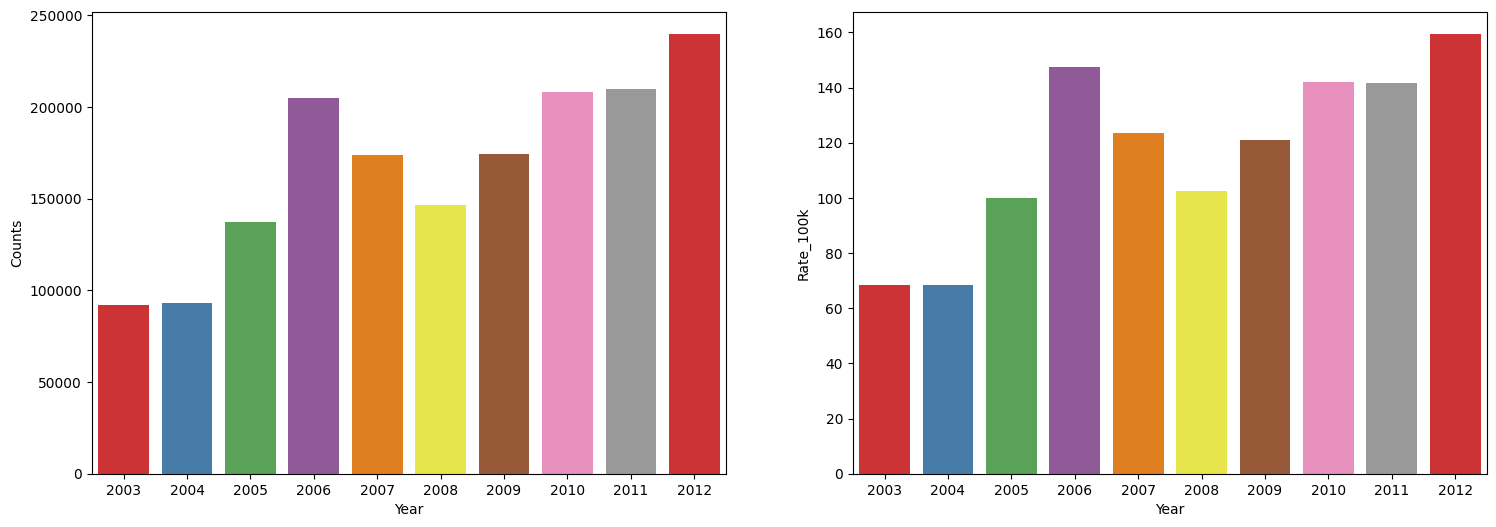

In [86]:
fig, ax = plt.subplots(1,2,figsize=(18, 6))
sns.barplot(x='Year', y='Counts', data=theft_data_türkiye_upd, ax=ax[0],palette='Set1')
sns.barplot(x='Year', y='Rate_100k',data=theft_data_türkiye_upd, ax=ax[1],palette='Set1')



In [87]:
theft_data_türkiye_upd

,Country,Region,Subregion,Year,Counts,Rate_100k
0,Türkiye,Asia,Western Asia,2003,91848,68.5
1,Türkiye,Asia,Western Asia,2004,93073,68.5
2,Türkiye,Asia,Western Asia,2005,137097,100.0
3,Türkiye,Asia,Western Asia,2006,204863,147.5
4,Türkiye,Asia,Western Asia,2007,173948,123.5
5,Türkiye,Asia,Western Asia,2008,146513,102.5
6,Türkiye,Asia,Western Asia,2009,174545,121.0
7,Türkiye,Asia,Western Asia,2010,207945,142.0
8,Türkiye,Asia,Western Asia,2011,209866,141.5
9,Türkiye,Asia,Western Asia,2012,239926,159.5


In [88]:
df['Subregion'].unique()

array(['Southern Europe', 'Northern Africa',
       'Latin America and the Caribbean', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Southern Asia',
       'Eastern Europe', 'Sub-Saharan Africa', 'Northern America',
       'South-eastern Asia', 'Eastern Asia', 'Northern Europe',
       'Central Asia', 'Melanesia'], dtype=object)

### 2.5.1. Now, I will add the data related to theft for Turkey, and for the rate per 100,000, I will add the world average and the European average by year, and then plot this as a column chart.

In [89]:
def create_special_rate_100k(year, place):
    
    if place is None:
        
        return round(df[(df['Year'] == year) & (df['Category'].str.contains('theft',case=False))]['Rate_100k'].copy().mean(),1)
    
    elif place in list(df['Subregion'].unique()):
        
        return round(df[(df['Year'] == year) & (df['Subregion'] == place) & (df['Category'].str.contains('theft',case=False))]['Rate_100k'].copy().mean(),1)
    
    elif place in list(df['Region'].unique()):
        
        return round(df[(df['Year'] == year) & (df['Region'] == place) & (df['Category'].str.contains('theft',case=False))]['Rate_100k'].copy().mean(),1)
    
    elif place in list(df['Country'].unique()):
        
        return round(df[(df['Year'] == year) & (df['Country'] == place) & (df['Category'].str.contains('theft',case=False))]['Rate_100k'].copy().mean(),1)
    
    else:
        print(f'There is no such a place that called {place}')

In [90]:
theft_data_türkiye_upd['Europe_rate_100k'] = np.vectorize(create_special_rate_100k)(theft_data_türkiye_upd['Year'],'Europe')

In [91]:
theft_data_türkiye_upd['World_rate_100k'] = np.vectorize(create_special_rate_100k)(theft_data_türkiye_upd['Year'],None)

In [92]:
theft_data_türkiye_upd

,Country,Region,Subregion,Year,Counts,Rate_100k,Europe_rate_100k,World_rate_100k
0,Türkiye,Asia,Western Asia,2003,91848,68.5,1039.3,735.7
1,Türkiye,Asia,Western Asia,2004,93073,68.5,973.0,630.1
2,Türkiye,Asia,Western Asia,2005,137097,100.0,841.3,527.6
3,Türkiye,Asia,Western Asia,2006,204863,147.5,803.6,514.6
4,Türkiye,Asia,Western Asia,2007,173948,123.5,762.5,503.1
5,Türkiye,Asia,Western Asia,2008,146513,102.5,741.0,490.3
6,Türkiye,Asia,Western Asia,2009,174545,121.0,722.0,483.0
7,Türkiye,Asia,Western Asia,2010,207945,142.0,726.9,475.8
8,Türkiye,Asia,Western Asia,2011,209866,141.5,746.7,493.8
9,Türkiye,Asia,Western Asia,2012,239926,159.5,724.2,472.4



To plot the graph, we need to unpivot the columns containing the rates per 100,000.


In [93]:
unpivoted_data_türkiye = pd.melt(frame=theft_data_türkiye_upd,id_vars=['Country','Region','Subregion','Year','Counts'], value_vars=['Rate_100k', 'Europe_rate_100k','World_rate_100k'],
       value_name='Rate_100k_Upd', var_name='Rate_Type').sort_values('Year')

In [94]:
unpivoted_data_türkiye

,Country,Region,Subregion,Year,Counts,Rate_Type,Rate_100k_Upd
0,Türkiye,Asia,Western Asia,2003,91848,Rate_100k,68.5
20,Türkiye,Asia,Western Asia,2003,91848,World_rate_100k,735.7
10,Türkiye,Asia,Western Asia,2003,91848,Europe_rate_100k,1039.3
1,Türkiye,Asia,Western Asia,2004,93073,Rate_100k,68.5
21,Türkiye,Asia,Western Asia,2004,93073,World_rate_100k,630.1
11,Türkiye,Asia,Western Asia,2004,93073,Europe_rate_100k,973.0
2,Türkiye,Asia,Western Asia,2005,137097,Rate_100k,100.0
22,Türkiye,Asia,Western Asia,2005,137097,World_rate_100k,527.6
12,Türkiye,Asia,Western Asia,2005,137097,Europe_rate_100k,841.3
3,Türkiye,Asia,Western Asia,2006,204863,Rate_100k,147.5


In [95]:
unpivoted_data_türkiye['Rate_Type'] = unpivoted_data_türkiye['Rate_Type'].map({'Rate_100k':'Türkiye_rate_100k','Europe_rate_100k':'Europe_rate_100k','World_rate_100k':'World_rate_100k'})

In [96]:
unpivoted_data_türkiye

,Country,Region,Subregion,Year,Counts,Rate_Type,Rate_100k_Upd
0,Türkiye,Asia,Western Asia,2003,91848,Türkiye_rate_100k,68.5
20,Türkiye,Asia,Western Asia,2003,91848,World_rate_100k,735.7
10,Türkiye,Asia,Western Asia,2003,91848,Europe_rate_100k,1039.3
1,Türkiye,Asia,Western Asia,2004,93073,Türkiye_rate_100k,68.5
21,Türkiye,Asia,Western Asia,2004,93073,World_rate_100k,630.1
11,Türkiye,Asia,Western Asia,2004,93073,Europe_rate_100k,973.0
2,Türkiye,Asia,Western Asia,2005,137097,Türkiye_rate_100k,100.0
22,Türkiye,Asia,Western Asia,2005,137097,World_rate_100k,527.6
12,Türkiye,Asia,Western Asia,2005,137097,Europe_rate_100k,841.3
3,Türkiye,Asia,Western Asia,2006,204863,Türkiye_rate_100k,147.5


<Axes: xlabel='Year', ylabel='Rate_100k_Upd'>

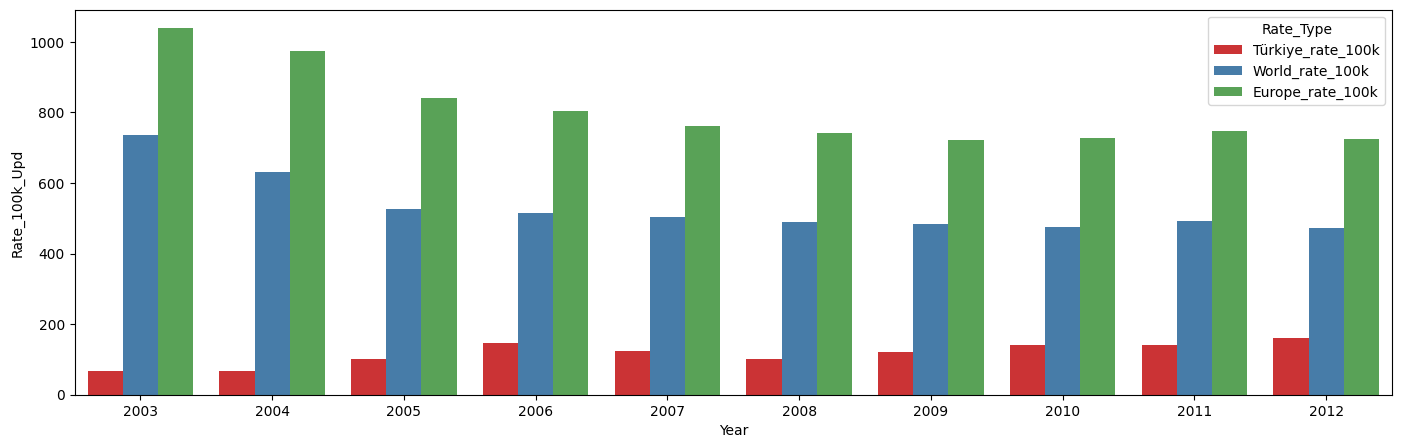

In [97]:
plt.figure(figsize=(17,5))
sns.barplot(x='Year', y='Rate_100k_Upd', data=unpivoted_data_türkiye,hue='Rate_Type',palette='Set1')


While there was a slight decreasing trend in theft-related crimes in the world and Europe, there had been a slight increase in Turkey between 2003 and 2012.

In [98]:
filter_data_counts_by_place('Türkiye')

,Year,Theft,Theft: of a motorized vehicle,Burglary,Smuggling of migrants,Corruption,Corruption: Bribery,Corruption: Other acts of corruption,Fraud,Fraud: Cyber-related (Cy),Money laundering
0,2003,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2012,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.6. Now, I will plot the trend graph of human trafficking crimes worldwide for the years 2016-2020. I have chosen these years because these are the years with the most data provided by countries, and the number of countries providing data is similar during these years.

In [99]:
world_smuggling_data = df[
    df['Year'].isin([2016, 2017, 2018, 2019, 2020]) & (df['Category'] == 'Smuggling of migrants')
].copy().reset_index(drop=True).groupby(['Year'])['Counts'].sum().to_frame().reset_index()

In [100]:
world_smuggling_data

,Year,Counts
0,2016,60035
1,2017,62986
2,2018,79712
3,2019,96626
4,2020,57849


<Axes: xlabel='Year', ylabel='Counts'>

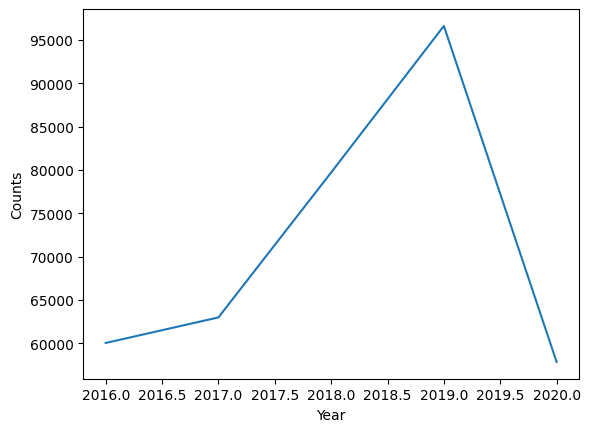

In [101]:
sns.lineplot(data=world_smuggling_data,x='Year',y='Counts')

In [102]:
world_smuggling_data['Year'] = world_smuggling_data['Year'].astype(str)

<Axes: xlabel='Year', ylabel='Counts'>

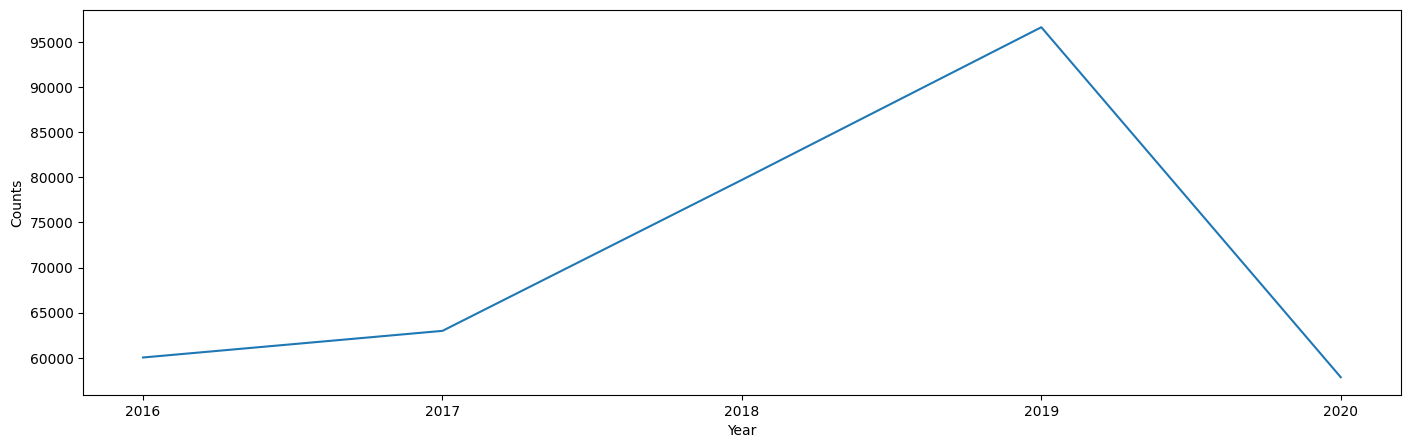

In [103]:
plt.figure(figsize=(17,5))
sns.lineplot(data=world_smuggling_data,x='Year',y='Counts', sizes=25)


From this graph, we can see that there was a significant increase in human trafficking in 2018 and 2019, and it likely decreased again in 2020, probably due to the pandemic.

### 2.6.1. Now let's look at human trafficking crimes for Turkey between 2013 and 2021.

In [104]:
türkiye_smuggling_data = df[
    df['Year'].isin([2013,2014,2015,2016, 2017, 2018, 2019, 2020, 2021]) & (df['Category'] == 'Smuggling of migrants') & (df['Country'] == 'Türkiye')
].copy().reset_index(drop=True).groupby(['Year'])['Counts'].sum().to_frame().reset_index()

In [105]:
türkiye_smuggling_data

,Year,Counts
0,2013,3703
1,2014,3396
2,2016,8239
3,2017,3064
4,2018,4202
5,2019,6043
6,2020,2561
7,2021,4709


In [106]:
türkiye_smuggling_data['Year'] = türkiye_smuggling_data['Year'].astype(str)

<Axes: xlabel='Year', ylabel='Counts'>

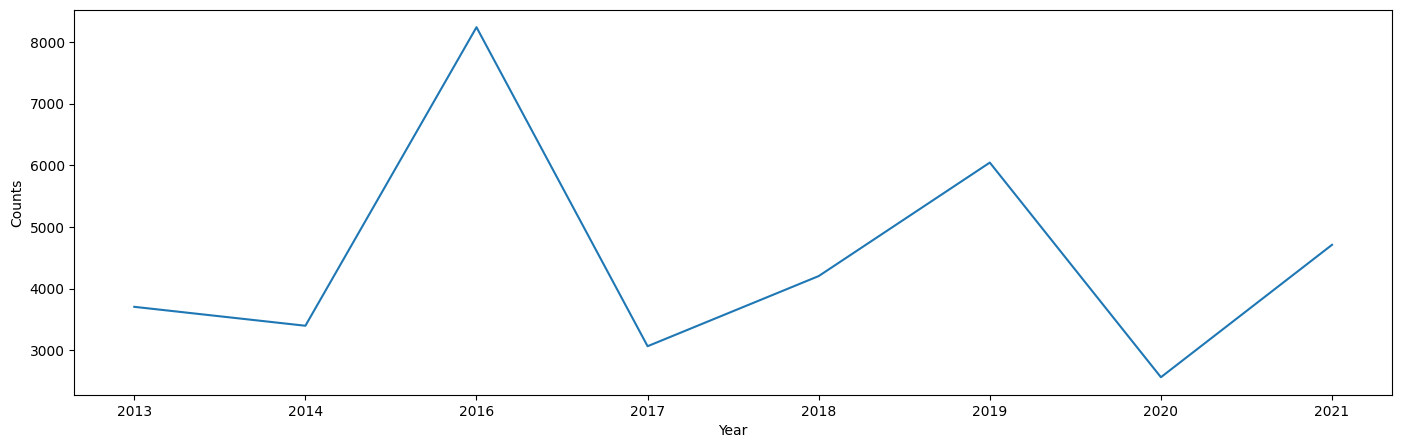

In [107]:
plt.figure(figsize=(17,5))
sns.lineplot(data=türkiye_smuggling_data,x='Year',y='Counts', sizes=25)

Here, human trafficking crimes peaked in 2016 and dropped significantly in 2017. It increased until 2019, then dropped significantly again in 2020, and showed a high increase in 2021.

### 2.6.2. Let's also look at the United States in the same way.

In [108]:
filter_data_counts_by_place('United States of America')

,Year,Burglary,Theft,Theft: of a motorized vehicle,Corruption,Fraud,Smuggling of migrants,Corruption: Bribery,Corruption: Other acts of corruption
0,2003,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2004,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2005,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,2006,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,2007,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
5,2008,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
6,2009,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
7,2010,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
8,2011,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
9,2012,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [109]:
us_smuggling_data = df[
    df['Year'].isin([2016, 2017, 2018, 2019]) & (df['Category'] == 'Smuggling of migrants') & (df['Country'] == 'United States of America')
].copy().reset_index(drop=True).groupby(['Year'])['Counts'].sum().to_frame().reset_index()

In [110]:
us_smuggling_data

,Year,Counts
0,2016,4176
1,2017,4190
2,2018,4851
3,2019,6180


In [111]:
us_smuggling_data['Year'] = us_smuggling_data['Year'].astype(str)

<Axes: xlabel='Year', ylabel='Counts'>

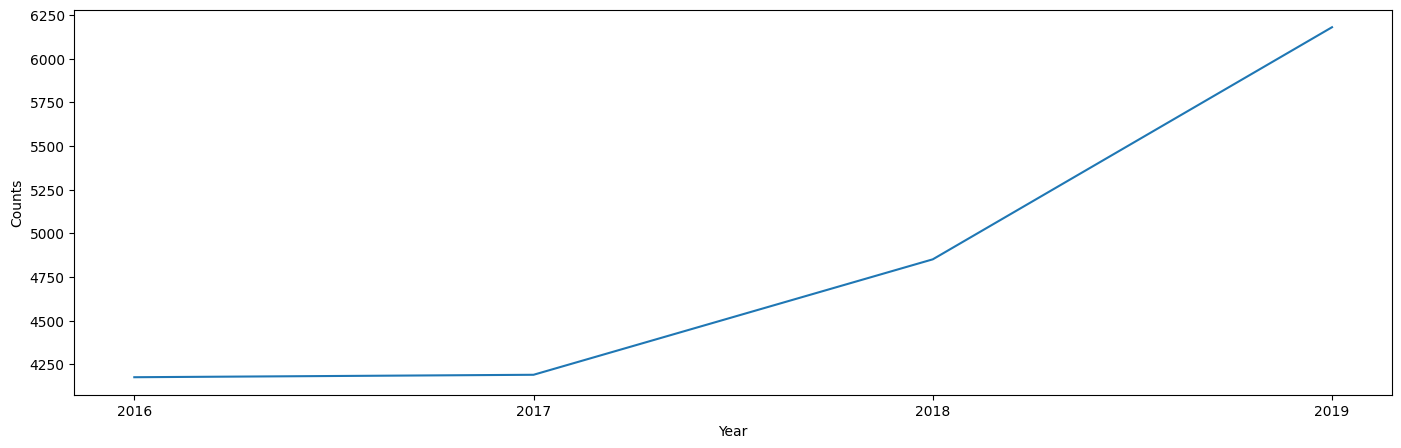

In [112]:
plt.figure(figsize=(17,5))
sns.lineplot(data=us_smuggling_data,x='Year',y='Counts', sizes=25)


It is evident that there was a significant increase in human trafficking crimes from 2016 to 2019 in USA.

Despite the fact that the population of the United States is 4-5 times larger than that of Turkey, we can see that the number of human trafficking crimes in Turkey is similar to or even higher than that in the United States.

### 2.6.3. Now let's look at what percentage of human trafficking crimes in Turkey have occurred each year between 2016 and 2020.

In [113]:
türkiye_smuggling_data

,Year,Counts
0,2013,3703
1,2014,3396
2,2016,8239
3,2017,3064
4,2018,4202
5,2019,6043
6,2020,2561
7,2021,4709


In [114]:
türkiye_smuggling_data = türkiye_smuggling_data.iloc[2:6,:].reset_index(drop=True)

In [115]:
world_smuggling_data = world_smuggling_data.iloc[:4,:]

In [116]:
türkiye_smuggling_data

,Year,Counts
0,2016,8239
1,2017,3064
2,2018,4202
3,2019,6043


In [117]:
world_smuggling_data.loc[:,'Türkiye/World'] = türkiye_smuggling_data['Counts'].copy() / world_smuggling_data['Counts'].copy() * 100

C:\Users\Roman\AppData\Local\Temp\ipykernel_7396\644809061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_smuggling_data.loc[:,'Türkiye/World'] = türkiye_smuggling_data['Counts'].copy() / world_smuggling_data['Counts'].copy() * 100


In [118]:
world_smuggling_data

,Year,Counts,Türkiye/World
0,2016,60035,13.723661
1,2017,62986,4.864573
2,2018,79712,5.271477
3,2019,96626,6.25401


## 2.7. Technology Related Crimes Analysis
- I will look at the data from 2014 to 2020 to see how much they have tended worldwide.
- Then, I will examine the rates per 100,000 in North Europe and Western Europe.

Now, I want it to bring the ones containing 'cyber' or 'computer' in the crime categories. This way, we can retrieve technology-related crimes.

In [119]:
cyber_crime_data = df[(df['Category'].str.contains('cyber|computer',case=False)) & (df['Year'].isin([2014,2015,2016, 2017, 2018, 2019]))].copy()

In [120]:
cyber_crime_data

,Country,Region,Subregion,Year,Indicator,Category,Counts,Rate_100k
38,Albania,Europe,Southern Europe,2015,Offences,Fraud: Cyber-related (Cy),51,2
42,Albania,Europe,Southern Europe,2015,Offences,Unlawful access to a computer system,5,0
44,Albania,Europe,Southern Europe,2015,Offences,Unlawful interference with a computer system o...,40,1
52,Albania,Europe,Southern Europe,2016,Offences,Fraud: Cyber-related (Cy),51,2
57,Albania,Europe,Southern Europe,2016,Offences,Unlawful access to a computer system,12,0
...,...,...,...,...,...,...,...,...
10022,United Kingdom (Scotland),Europe,Northern Europe,2017,Offences,Unlawful interference with a computer system o...,22,0
10034,United Kingdom (Scotland),Europe,Northern Europe,2018,Offences,Unlawful access to a computer system,35,1
10035,United Kingdom (Scotland),Europe,Northern Europe,2018,Offences,Unlawful interference with a computer system o...,18,0
10042,United Kingdom (Scotland),Europe,Northern Europe,2019,Offences,Unlawful access to a computer system,36,1


In [121]:
'{:,.0f}'.format(cyber_crime_data['Counts'].sum())

'3,418,126'


3,418,126 individuals have committed technology-related crimes between 2014 and 2020.

<Axes: xlabel='Year', ylabel='Counts'>

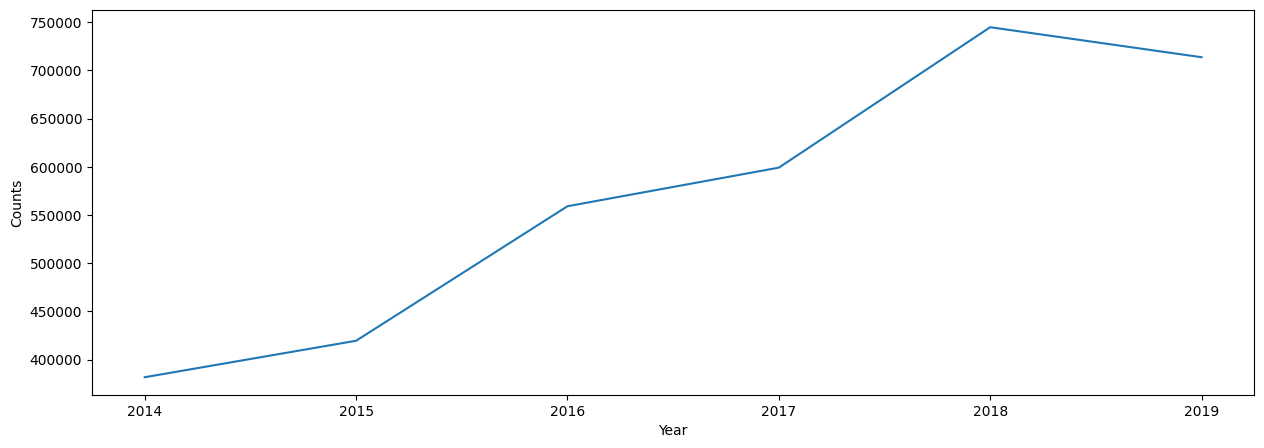

In [122]:
plt.figure(figsize=(15,5))
sns.lineplot(cyber_crime_data.groupby('Year')['Counts'].sum())

There was an significant increase in the crime rate from 2014 to 2018, with a slight decrease in 2019

In [123]:
cyber_crime_europe = cyber_crime_data[cyber_crime_data['Subregion'].isin(['Northern Europe','Western Europe'])]

In [124]:
cyber_crime_europe

,Country,Region,Subregion,Year,Indicator,Category,Counts,Rate_100k
536,Austria,Europe,Western Europe,2014,Offences,Fraud: Cyber-related (Cy),6635,78
546,Austria,Europe,Western Europe,2015,Offences,Fraud: Cyber-related (Cy),7473,86
560,Austria,Europe,Western Europe,2016,Offences,Fraud: Cyber-related (Cy),9672,111
565,Austria,Europe,Western Europe,2016,Offences,Unlawful access to a computer system,512,6
566,Austria,Europe,Western Europe,2016,Offences,Unlawful interception or access of computer data,746,9
...,...,...,...,...,...,...,...,...
10022,United Kingdom (Scotland),Europe,Northern Europe,2017,Offences,Unlawful interference with a computer system o...,22,0
10034,United Kingdom (Scotland),Europe,Northern Europe,2018,Offences,Unlawful access to a computer system,35,1
10035,United Kingdom (Scotland),Europe,Northern Europe,2018,Offences,Unlawful interference with a computer system o...,18,0
10042,United Kingdom (Scotland),Europe,Northern Europe,2019,Offences,Unlawful access to a computer system,36,1


In [125]:
cyber_crime_europe_upd = cyber_crime_europe.groupby(['Subregion','Year'])['Rate_100k'].mean().to_frame().reset_index().sort_values('Year')

In [126]:
cyber_crime_europe_upd

,Subregion,Year,Rate_100k
0,Northern Europe,2014,59.066667
6,Western Europe,2014,41.444444
1,Northern Europe,2015,81.642857
7,Western Europe,2015,42.555556
2,Northern Europe,2016,84.5
8,Western Europe,2016,27.0
3,Northern Europe,2017,82.764706
9,Western Europe,2017,22.125
4,Northern Europe,2018,93.578947
10,Western Europe,2018,24.411765


In [127]:
cyber_crime_europe_upd.loc[:,'Rate_100k'] = cyber_crime_europe_upd['Rate_100k'].apply(lambda x: round(x,0))

In [128]:
cyber_crime_europe_upd

,Subregion,Year,Rate_100k
0,Northern Europe,2014,59.0
6,Western Europe,2014,41.0
1,Northern Europe,2015,82.0
7,Western Europe,2015,43.0
2,Northern Europe,2016,84.0
8,Western Europe,2016,27.0
3,Northern Europe,2017,83.0
9,Western Europe,2017,22.0
4,Northern Europe,2018,94.0
10,Western Europe,2018,24.0


<Axes: xlabel='Year', ylabel='Rate_100k'>

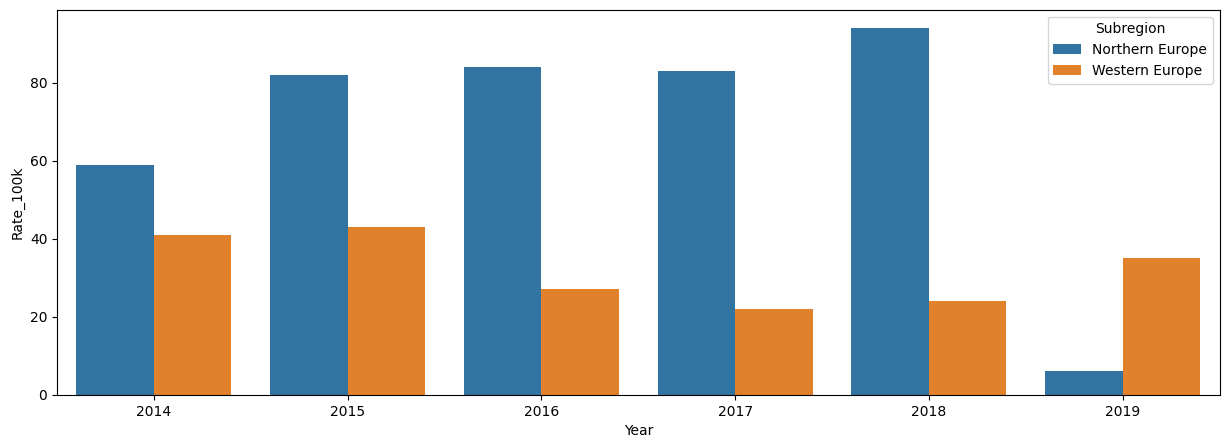

In [129]:
plt.figure(figsize=(15,5))
sns.barplot(data=cyber_crime_europe_upd,x='Year',y='Rate_100k',hue='Subregion')


Here, there is a slight increase in technology-related crimes in Northern Europe between 2014 and 2018. In Western Europe, on the other hand, there is a slight decrease. By the time we reach 2019, we see an increase in Western Europe, while there is a significant decrease in Northern Europe. This decrease may be due to a lack of data. Let's use the function we created earlier to look at the crime categories related to Northern Europe and the total number of country entries for each year.

In [130]:
filter_data_counts_by_place('Northern Europe')

There are  12 countries in the subregion of Northern Europe


,Year,Theft,Theft: of a motorized vehicle,Burglary,Smuggling of migrants,Fraud,Corruption,Corruption: Bribery,Money laundering,Acts that cause environmental pollution or degradation,Corruption: Other acts of corruption,Acts involving the movement of dumping of waste,Unlawful access to a computer system,Acts that result in the depletion of degradation of natural resources,Unlawful interference with a computer system or computer data,Trade or possession of protected or prohibited species of faune and flora,Unlawful interception or access of computer data,Fraud: Cyber-related (Cy)
0,2003,12.0,12.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,12.0,12.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,12.0,11.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006,12.0,11.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,12.0,12.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008,12.0,12.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009,12.0,12.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010,12.0,12.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011,11.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2012,12.0,12.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When we examine the table, we do not see any information indicating that significantly less data was entered compared to previous years for Northern Europe.

Perhaps no data entry was made in Northern Europe for important countries in 2019. Therefore, we will look at the Northern European countries where data entry was made for technology-related crimes in 2017 and 2018, and determine the countries where no data entry was made in 2019. We will then examine what percentage of technology-related crimes committed in Northern Europe in 2017 and 2018 these countries account for.

In [131]:
list1 = list(df[
    (df['Year'].isin([2017,2018])) & (df['Category'].str.contains('computer|cyber',case=False,regex=True)) & (df['Subregion'] == 'Northern Europe')
]['Country'].unique())

In [132]:
list2 = list(df[
    (df['Year'] == 2019) & (df['Category'].str.contains('computer|cyber',case=False,regex=True)) & (df['Subregion'] == 'Northern Europe')
]['Country'].unique())

In [133]:
difference = set(list1) - set(list2)

In [134]:
print(difference)

{'Sweden', 'United Kingdom (England and Wales)'}


In [135]:
count1 = df[
    (df['Year'].isin([2017,2018])) & (df['Category'].str.contains('computer|cyber',case=False,regex=True)) & (df['Subregion'] == 'Northern Europe')
]['Counts'].sum()

In [136]:
count2 = df[
    (df['Year'].isin([2017,2018])) & (df['Category'].str.contains('computer|cyber',case=False,regex=True)) & (df['Country'].isin(['United Kingdom (England and Wales)', 'Sweden']))
]['Counts'].sum()

In [137]:
(count2 /  count1)*100

98.40385855342176

As we can see, the countries 'United Kingdom (England and Wales)' and 'Sweden' where data entry was made in 2017 and 2018 but not in 2019, accounted for approximately 98% of all technology-related crimes. Therefore, we should ignore the 2019 data for Northern Europe in the above graph.